In [1]:
from google.colab import files
iris = files.upload()

Saving iris (2).csv to iris (2).csv


In [2]:
import pandas as pd
data1 = pd.read_csv("iris (2).csv")
df1 = pd.DataFrame(data1)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Accuracy (Linear Kernel): 1.0


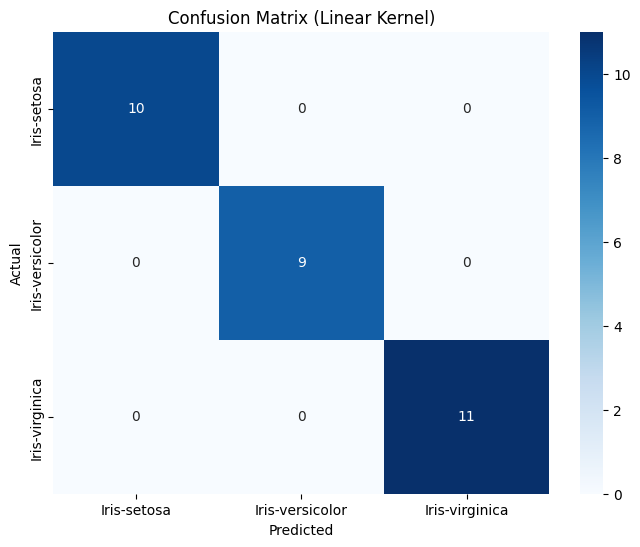

Accuracy (RBF Kernel): 1.0


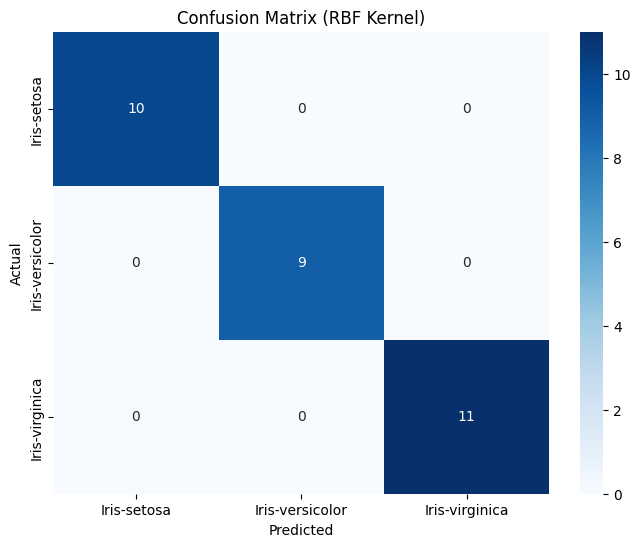

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df1.drop('species', axis=1)
y = df1['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel):", accuracy_linear)

cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_linear.classes_, yticklabels=svm_linear.classes_)
plt.title('Confusion Matrix (Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF Kernel):", accuracy_rbf)

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_rbf.classes_, yticklabels=svm_rbf.classes_)
plt.title('Confusion Matrix (RBF Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [5]:
data2 = files.upload()

Saving letter-recognition.csv to letter-recognition.csv


In [7]:
data2 = pd.read_csv("letter-recognition.csv")
df2 = pd.DataFrame(data2)
df2.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
df2.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


Accuracy (Linear Kernel): 0.8545


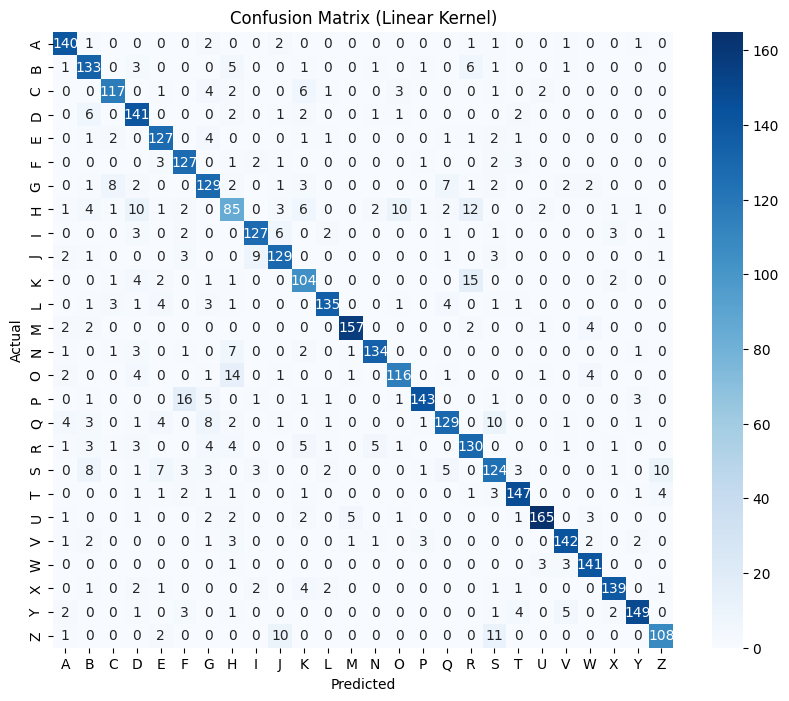

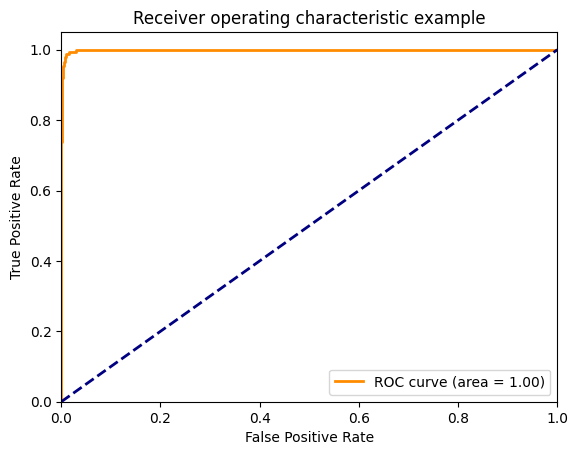

AUC score: 0.9991826406110851


In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

X = df2.drop('letter', axis=1)
y = df2['letter']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear Kernel): {accuracy_linear}")

cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Linear Kernel)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_prob_linear = svm_linear.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(le.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_linear[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"AUC score: {roc_auc[0]}")
